In [324]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [326]:
df = pd.read_csv('C:/Users/lenovo/Desktop/CodSoft/MOVIE-RATING-PREDICTION-WITH-PYTHON/IMDb Movies India.csv', encoding='latin-1')

In [327]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [328]:
df.shape

(15509, 10)

In [329]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [330]:
print(df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [331]:
print(df.isnull().sum()) 

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [332]:
df.dropna(inplace=True)

In [333]:
df.drop_duplicates(inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [334]:
df.shape

(5659, 10)

In [335]:
print(df.isnull().sum()) 

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


### Data cleaning

In [336]:
print(df['Year'].dtype)
df['Year'] = df['Year'].astype(str)
df['Duration'] = df['Duration'].astype(str)

# extract duration using regular expression
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(np.int64)

object


In [337]:
df['Year'] = df['Year'].astype(str).str.replace(r'[()]', '', regex=True).astype(np.int64)

In [338]:
df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(np.int64)
#df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', '')).astype(np.int64)



In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


In [341]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


#### Visualize data

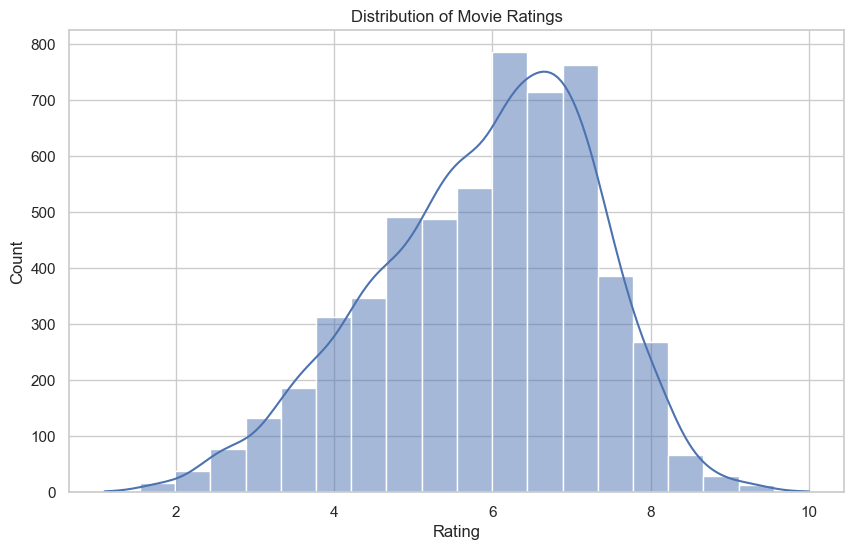

In [342]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

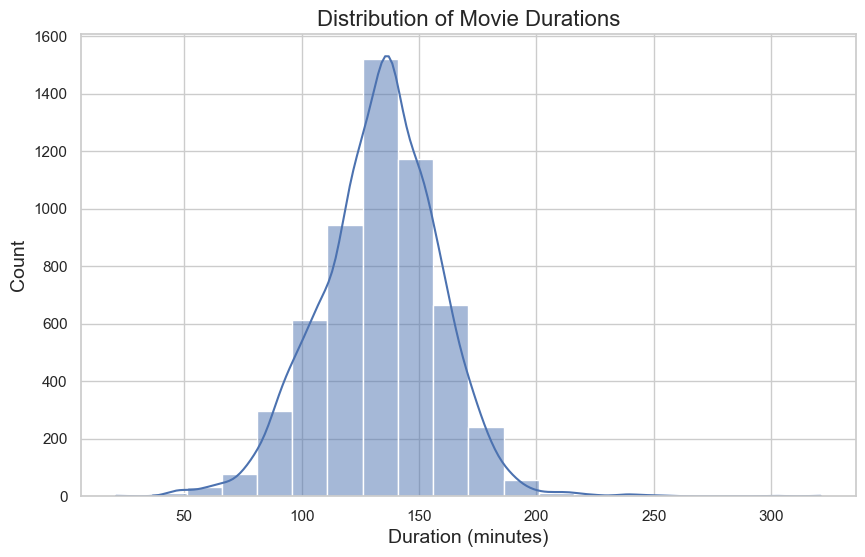

In [343]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()


In [344]:
# Split the genres (assumes genres are separated by commas in the 'Genre' column)
df['Genre'] = df['Genre'].str.split(', ')

# Explode the genres into separate rows
df_exploded = df.explode('Genre')

# Identify the top genres by their frequency
top_genres = df_exploded['Genre'].value_counts().head(5).index.tolist()

print("Top Genres:", top_genres)

Top Genres: ['Drama', 'Action', 'Romance', 'Comedy', 'Crime']


In [345]:
# Filter the dataset for top genres
df_top_genres = df_exploded[df_exploded['Genre'].isin(top_genres)]

# Group by 'Year' and 'Genre' and calculate the average rating
average_rating_by_year_genre = df_top_genres.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

print(average_rating_by_year_genre.head())


   Year    Genre  Rating
0  1931    Drama    5.75
1  1932  Romance    6.00
2  1933    Drama    6.20
3  1933  Romance    6.20
4  1934    Drama    8.50


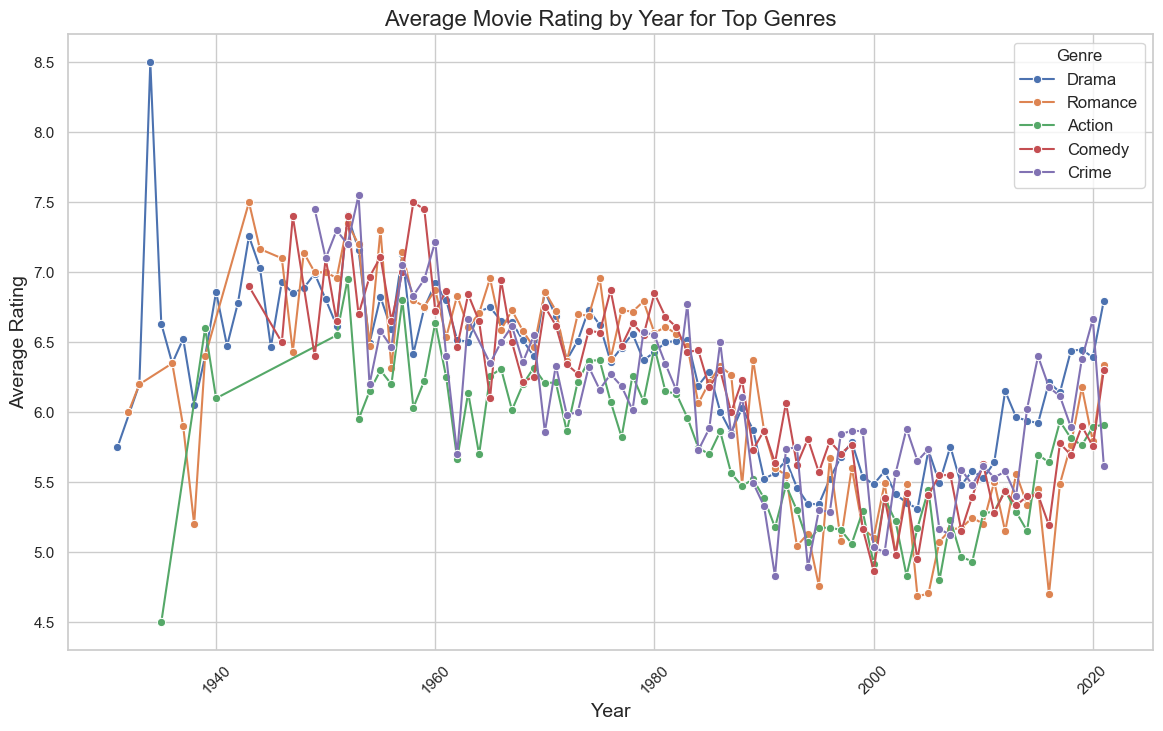

In [346]:
# Set the plot style
sns.set(style="whitegrid")

# Create a line plot for average rating by year for top genres
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_rating_by_year_genre, x='Year', y='Rating', hue='Genre', marker='o')

# Add titles and labels
plt.title('Average Movie Rating by Year for Top Genres', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.legend(title='Genre', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

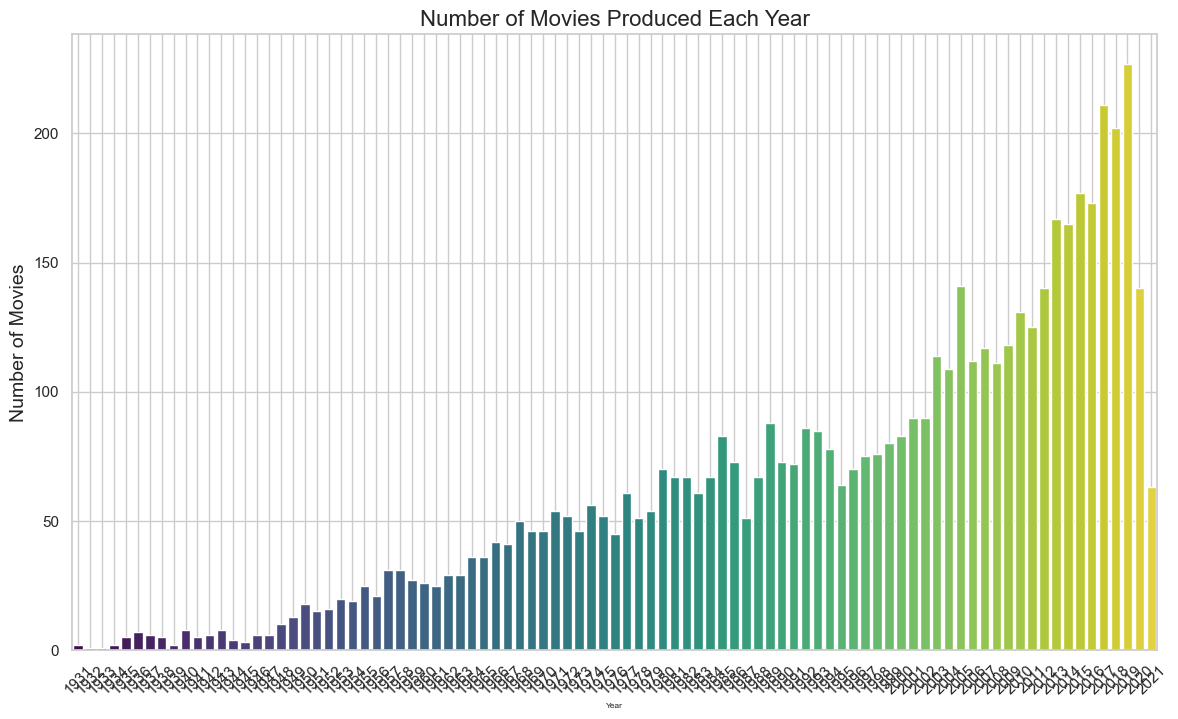

In [347]:
# Create a count plot for the number of movies produced each year
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Year', hue='Year', palette='viridis', legend=False)
plt.title('Number of Movies Produced Each Year', fontsize=16)
plt.xlabel('Year', fontsize=6)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


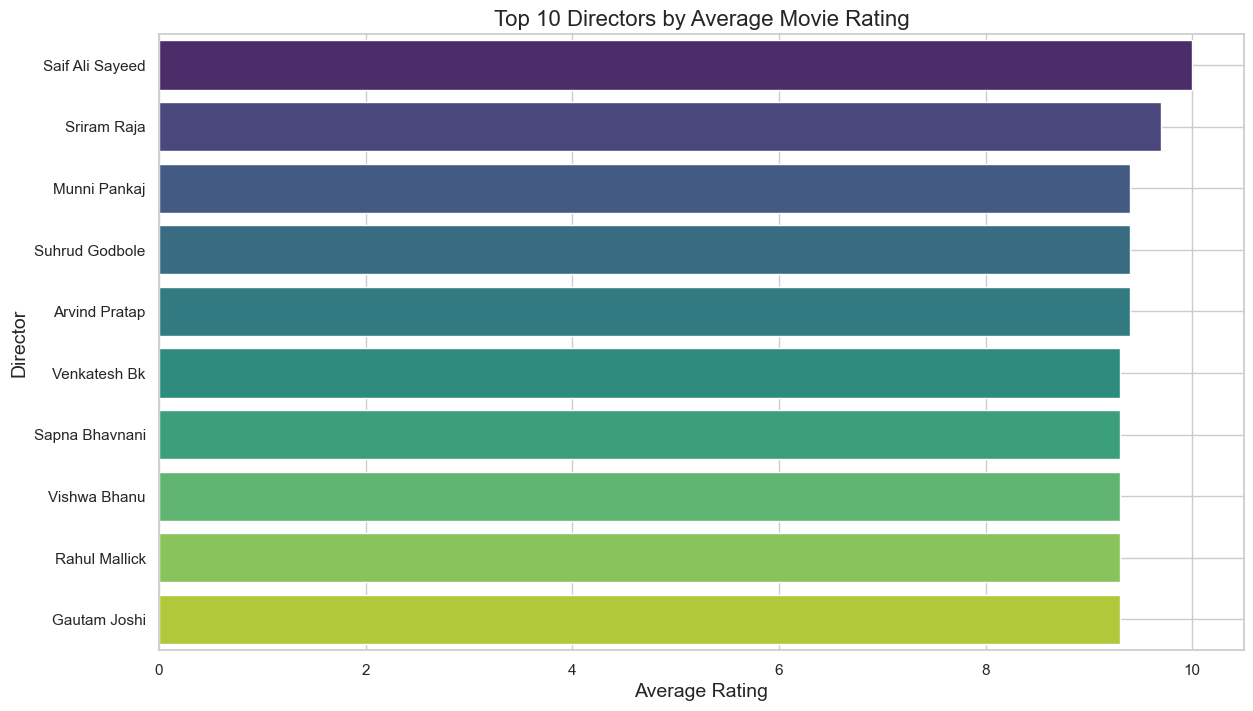

In [252]:
# Create a bar plot for average rating by director
plt.figure(figsize=(14, 8))
sns.barplot(data=average_rating_by_director, x='Rating', y='Director', hue='Director', palette='viridis', legend=False)
plt.title('Top 10 Directors by Average Movie Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.grid(True)
plt.show()

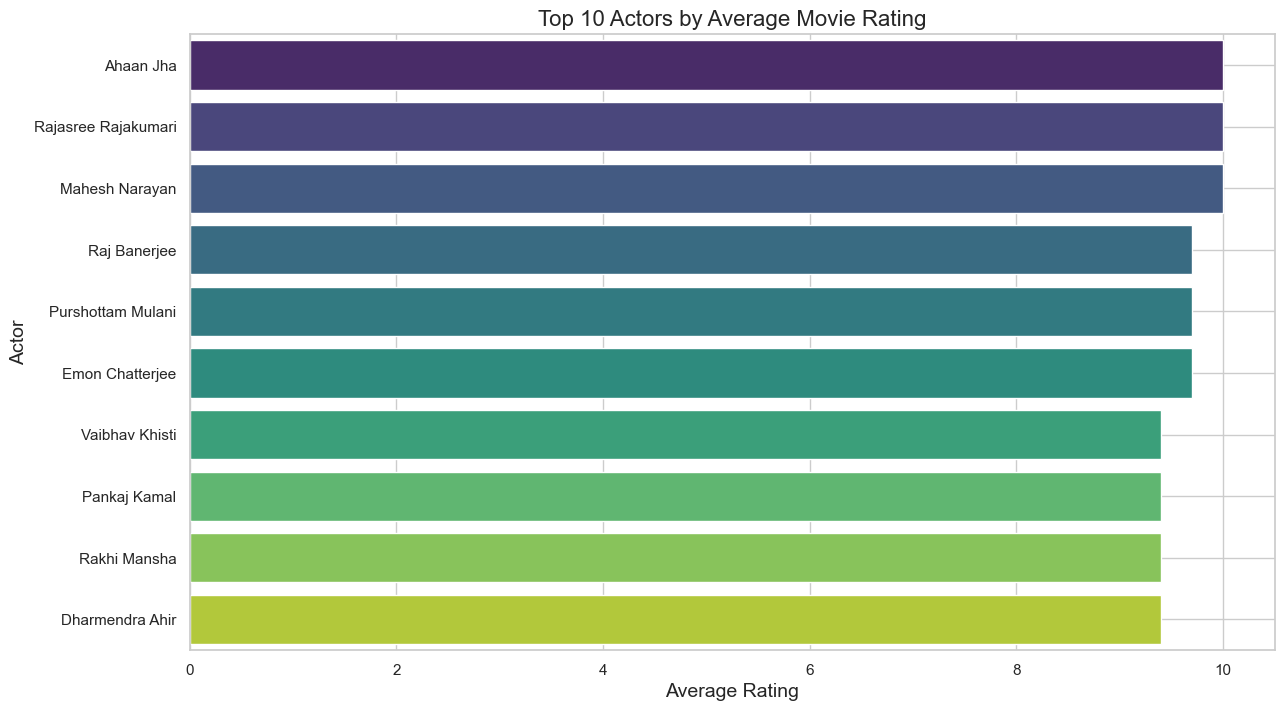

In [348]:
# Melt the dataframe to analyze actors individually
df_actors = df.melt(id_vars=['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director'],
                    value_vars=['Actor 1', 'Actor 2', 'Actor 3'], 
                    var_name='Actor_Position', value_name='Actor')

# Calculate the average rating by actor
average_rating_by_actor = df_actors.groupby('Actor')['Rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot for average rating by actor
plt.figure(figsize=(14, 8))
sns.barplot(data=average_rating_by_actor, x='Rating', y='Actor' , hue='Actor', palette='viridis')
plt.title('Top 10 Actors by Average Movie Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.grid(True)
plt.show()


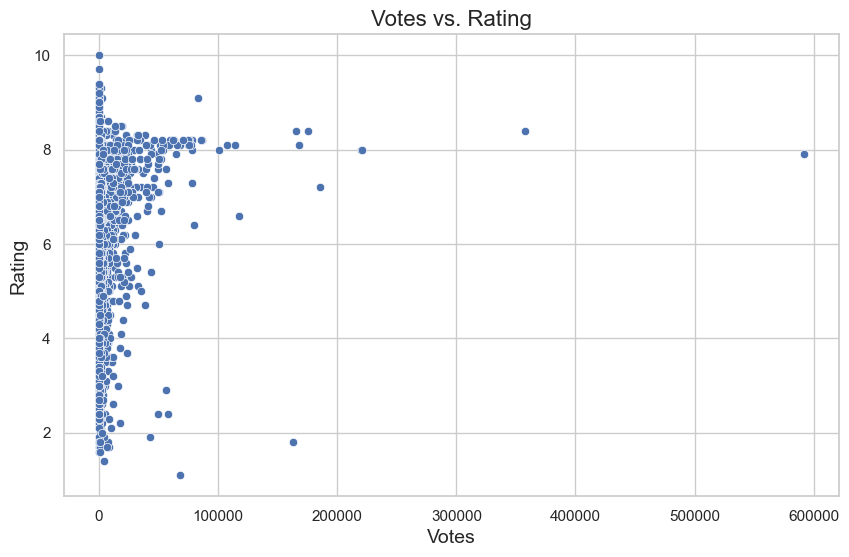

In [255]:
# Create a scatter plot for votes vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Votes', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(True)
plt.show()


### Exploratory Data Analysis (EDA)

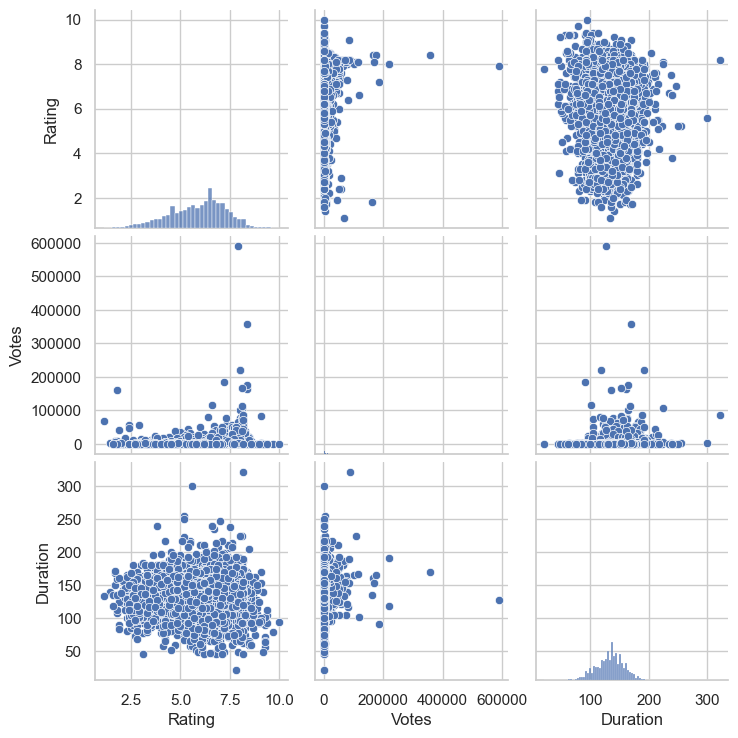

In [261]:
sns.pairplot(df[['Rating', 'Votes', 'Duration']])
plt.show()


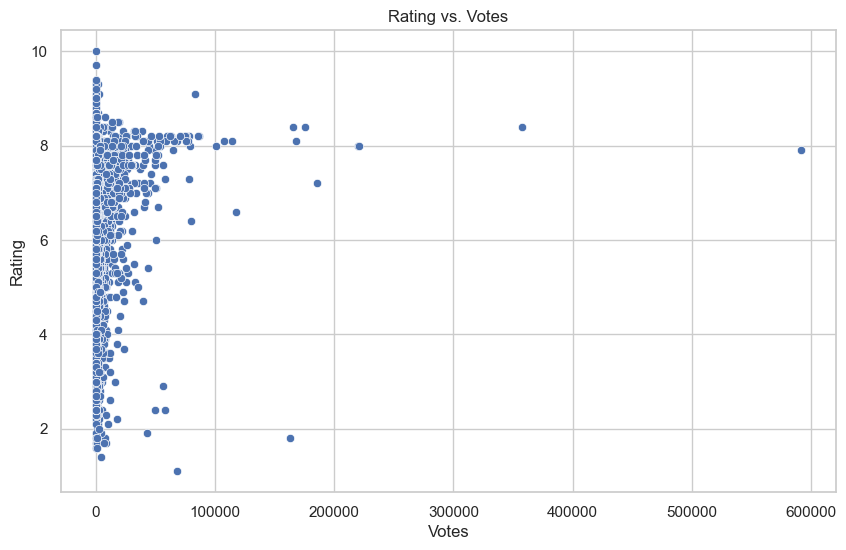

In [349]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Rating vs. Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


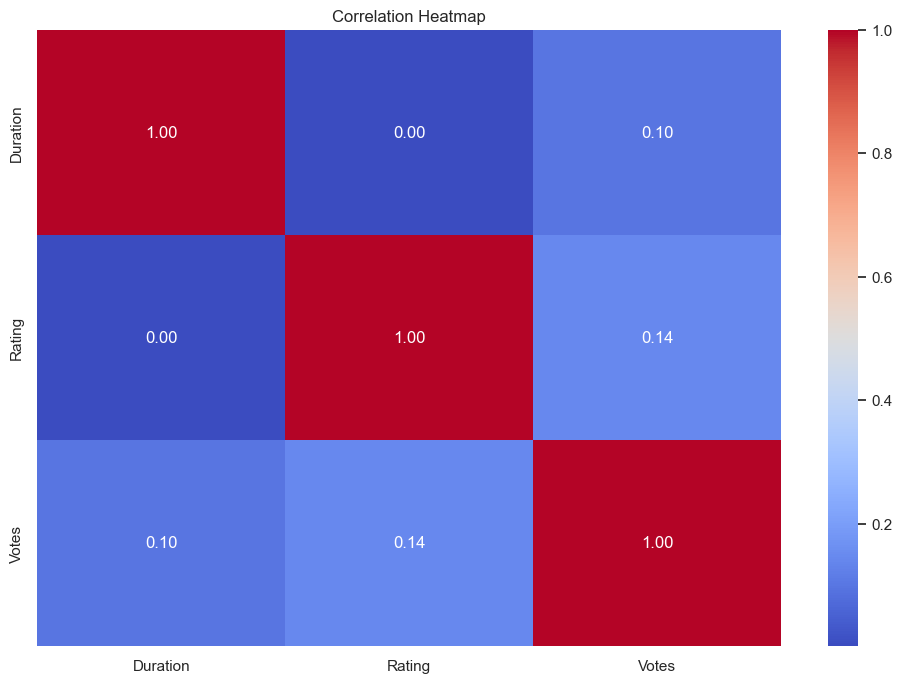

In [350]:

# Calculate the correlation matrix
corr_matrix = df[['Duration', 'Rating', 'Votes']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Feature Engineering

In [273]:
# Drop unnecessary columns if they do not impact the outcome
df = df.drop(columns=['Name'])

In [278]:
# Group by Genre, Director, and Actor and calculate their average ratings
average_rating_by_genre = df_exploded.groupby('Genre')['Rating'].mean()
average_rating_by_director = df.groupby('Director')['Rating'].mean()
average_rating_by_actor = df_actors.groupby('Actor')['Rating'].mean()

In [281]:
# Map these average ratings back to the original dataframe
df['Genre_Avg_Rating'] = df['Genre'].apply(lambda genres: np.mean([average_rating_by_genre[genre] for genre in genres if genre in average_rating_by_genre]))
df['Director_Avg_Rating'] = df['Director'].map(average_rating_by_director)
df['Actor1_Avg_Rating'] = df['Actor 1'].map(average_rating_by_actor)
df['Actor2_Avg_Rating'] = df['Actor 2'].map(average_rating_by_actor)
df['Actor3_Avg_Rating'] = df['Actor 3'].map(average_rating_by_actor)

In [282]:
# Fill NaN values with the mean of the respective columns
df['Director_Avg_Rating'] = df['Director_Avg_Rating'].fillna(df['Director_Avg_Rating'].mean())
df['Actor1_Avg_Rating'] = df['Actor1_Avg_Rating'].fillna(df['Actor1_Avg_Rating'].mean())
df['Actor2_Avg_Rating'] = df['Actor2_Avg_Rating'].fillna(df['Actor2_Avg_Rating'].mean())
df['Actor3_Avg_Rating'] = df['Actor3_Avg_Rating'].fillna(df['Actor3_Avg_Rating'].mean())


In [283]:
# Create a combined actor average rating feature
df['Actors_Avg_Rating'] = df[['Actor1_Avg_Rating', 'Actor2_Avg_Rating', 'Actor3_Avg_Rating']].mean(axis=1)

In [286]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Avg_Rating,Director_Avg_Rating,Actor1_Avg_Rating,Actor2_Avg_Rating,Actor3_Avg_Rating,Actors_Avg_Rating
1,2019,109,[Drama],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.056744,7.000000,6.566667,7.000000,7.000000,6.855556
3,2019,110,"[Comedy, Romance]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.781064,4.400000,5.666667,4.400000,4.450000,4.838889
5,1997,147,"[Comedy, Drama, Musical]",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.018210,5.313333,4.856757,5.948148,6.646296,5.817067
6,2005,142,"[Drama, Romance, War]",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.949883,7.383333,5.723810,5.566667,6.516667,5.935714
8,2012,82,"[Horror, Mystery, Thriller]",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.438378,5.600000,5.600000,5.729412,5.600000,5.643137


In [287]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 5659 non-null   int64  
 1   Duration             5659 non-null   int64  
 2   Genre                5659 non-null   object 
 3   Rating               5659 non-null   float64
 4   Votes                5659 non-null   int64  
 5   Director             5659 non-null   object 
 6   Actor 1              5659 non-null   object 
 7   Actor 2              5659 non-null   object 
 8   Actor 3              5659 non-null   object 
 9   Genre_Avg_Rating     5659 non-null   float64
 10  Director_Avg_Rating  5659 non-null   float64
 11  Actor1_Avg_Rating    5659 non-null   float64
 12  Actor2_Avg_Rating    5659 non-null   float64
 13  Actor3_Avg_Rating    5659 non-null   float64
 14  Actors_Avg_Rating    5659 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory 

In [295]:
# Select features (X) and target (y)
X = df[['Genre_Avg_Rating', 'Director_Avg_Rating', 'Actor1_Avg_Rating', 'Actor2_Avg_Rating', 'Actor3_Avg_Rating', 'Votes', 'Year', 'Duration']]
y = df['Rating']


In [296]:
X.head()

,Genre_Avg_Rating,Director_Avg_Rating,Actor1_Avg_Rating,Actor2_Avg_Rating,Actor3_Avg_Rating,Votes,Year,Duration
1,6.056744,7.000000,6.566667,7.000000,7.000000,8,2019,109
3,5.781064,4.400000,5.666667,4.400000,4.450000,35,2019,110
5,6.018210,5.313333,4.856757,5.948148,6.646296,827,1997,147
6,5.949883,7.383333,5.723810,5.566667,6.516667,1086,2005,142
8,5.438378,5.600000,5.600000,5.729412,5.600000,326,2012,82


In [298]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

### Split the data into training and testing sets

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Model Building

In [351]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [352]:
X_train.head()

,Genre_Avg_Rating,Director_Avg_Rating,Actor1_Avg_Rating,Actor2_Avg_Rating,Actor3_Avg_Rating,Votes,Year,Duration
9424,6.056744,8.000000,5.176471,8.000000,8.00000,13,2016,143
12009,6.056744,6.923077,6.700000,6.428571,6.30000,30,1942,153
4316,6.208969,6.212500,6.000000,5.521429,6.72500,455,1989,147
6897,6.018210,6.712500,6.646296,6.475000,6.74375,467,1961,139
2338,6.056744,5.450000,6.400000,5.900000,6.40000,22,2012,74


In [353]:
y_train.head()

9424     8.0
12009    6.3
4316     7.2
6897     7.3
2338     6.4
Name: Rating, dtype: float64

### Train the models

In [354]:
# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Model evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}, Training MAE: {train_mae:.4f}, Training R^2: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, Testing MAE: {test_mae:.4f}, Testing R^2: {test_r2:.4f}")


Training MSE: 0.4922, Training MAE: 0.5189, Training R^2: 0.7438
Testing MSE: 0.5120, Testing MAE: 0.5310, Testing R^2: 0.7235


### Model Test

In [355]:
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predictions:")
print(y_pred[:10])  # Displaying the first 10 predictions

Predictions:
[5.73354591 1.31199074 5.45237403 5.50044417 7.18389433 5.56147617
 5.82688847 3.22922552 5.87923805 6.93232967]


In [356]:
X.head(10)

,Genre_Avg_Rating,Director_Avg_Rating,Actor1_Avg_Rating,Actor2_Avg_Rating,Actor3_Avg_Rating,Votes,Year,Duration
1,6.056744,7.000000,6.566667,7.000000,7.000000,8,2019,109
3,5.781064,4.400000,5.666667,4.400000,4.450000,35,2019,110
5,6.018210,5.313333,4.856757,5.948148,6.646296,827,1997,147
6,5.949883,7.383333,5.723810,5.566667,6.516667,1086,2005,142
8,5.438378,5.600000,5.600000,5.729412,5.600000,326,2012,82
9,5.656874,4.000000,4.000000,4.550000,4.000000,11,2014,116
10,6.056744,6.200000,5.361290,5.188571,5.877778,17,2004,96
11,4.817327,6.950000,5.122222,5.900000,5.900000,59,2016,120
12,5.419486,4.907143,5.205952,5.822727,5.188889,983,1991,161
13,5.872958,5.700000,6.300000,5.700000,5.700000,512,2012,166


In [357]:
y.head(10)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
Name: Rating, dtype: float64

In [363]:
new_data = {
    'Genre_Avg_Rating': [7.5],          
    'Director_Avg_Rating': [6.8],       
    'Actor1_Avg_Rating': [7.0],         
    'Actor2_Avg_Rating': [4.5],     
    'Actor3_Avg_Rating': [5.3],      
    'Votes': [1000],                   
    'Year': [1998],                
    'Duration': [150]               
}

# Convert dictionary to DataFrame
X_new = pd.DataFrame(new_data)

In [364]:
# Make prediction using the trained model
predicted_rating = model.predict(X_new)

# Display the predicted rating
print(f"Predicted Rating: {predicted_rating[0]:.2f}")


Predicted Rating: 6.27
